In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd

import random as python_random
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10

# seed 를 설정해서 학습시마다 동일한 결과 유도. 불행히도 의도한 대로 동작하지 않음. 
def set_random_seed(seed_value):
    np.random.seed(seed_value)
    python_random.seed(seed_value)
    tf.random.set_seed(seed_value)

# 0 ~ 1사이값의 float32로 변경하는 함수
def get_preprocessed_data(images, labels, scaling=True):#scaling false면 이후에 Image Data Generator에서 reshape로 정규화 진행
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    if scaling:
        images = np.array(images/255.0, dtype=np.float32)
    else:
        images = np.array(images, dtype=np.float32)
        
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels, scaling=False)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0 ~ 1사이값 float32로 변경 및 OHE 적용. 
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels ) 

# random seed는 2021로 고정.
set_random_seed(2021)
# CIFAR10 데이터 재 로딩 및 Scaling/OHE 전처리 적용하여 학습/검증/데이터 세트 생성. 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)

print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_oh_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(42500, 32, 32, 3) (42500, 10) (7500, 32, 32, 3) (7500, 10) (10000, 32, 32, 3) (10000, 10)


In [4]:
tr_images.dtype
type(tr_images)

numpy.ndarray

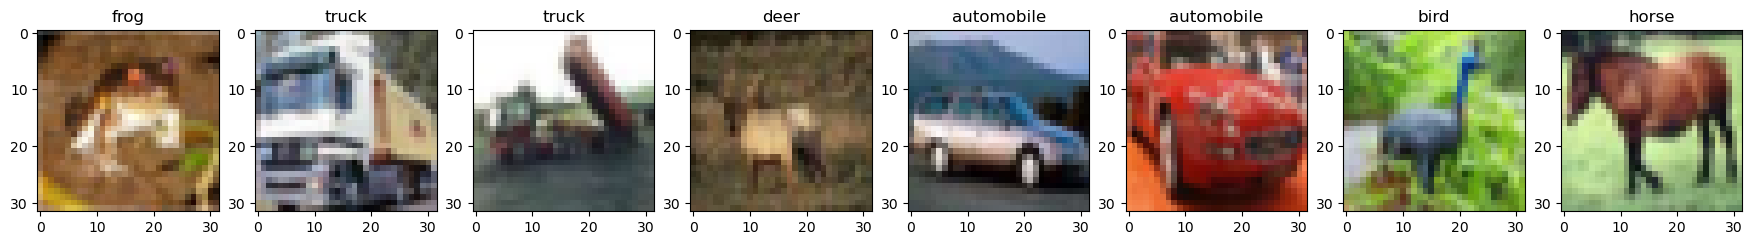

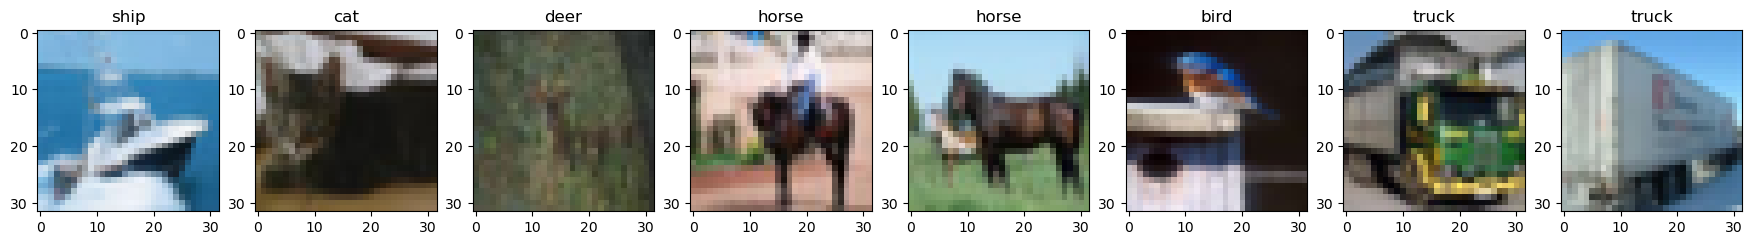

In [3]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        label = labels[i].squeeze()
        axs[i].set_title(NAMES[int(label)])
        
show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

### 이미지들의 특징
* 이미지들 대부분이 정중앙에 위치해있다.
* 32x32 이미지라 해상도가 매우 낮다. 이런 경우에 복잡한 augmentation을 진행하는 경우 오히려 성능 저하가 일어날 수 있다.

In [4]:
tr_images[:10]

array([[[[  3.,   3.,   3.],
         [  3.,   3.,   3.],
         [  3.,   3.,   3.],
         ...,
         [  3.,   3.,   2.],
         [  3.,   3.,   1.],
         [  3.,   3.,   1.]],

        [[  3.,   3.,   3.],
         [  3.,   3.,   3.],
         [  3.,   3.,   3.],
         ...,
         [  3.,   3.,   2.],
         [  3.,   3.,   2.],
         [  3.,   3.,   2.]],

        [[  3.,   3.,   3.],
         [  3.,   3.,   3.],
         [  3.,   3.,   3.],
         ...,
         [  3.,   3.,   3.],
         [  3.,   3.,   4.],
         [  3.,   3.,   4.]],

        ...,

        [[ 21.,  18.,  39.],
         [ 18.,  14.,  37.],
         [ 15.,  11.,  35.],
         ...,
         [ 16.,  13.,  31.],
         [ 10.,   7.,  25.],
         [  8.,   5.,  22.]],

        [[ 23.,  20.,  40.],
         [ 20.,  17.,  39.],
         [ 20.,  17.,  39.],
         ...,
         [ 25.,  23.,  40.],
         [ 21.,  18.,  37.],
         [ 19.,  16.,  35.]],

        [[ 26.,  23.,  42.],
       

In [5]:
IMAGE_SIZE = 32
BATCH_SIZE = 64

### ImageDataGenerator로 Augmentation 설정하고 학습용, 검증용 Generator 생성

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    #rotation_range=20,
    #zoom_range=(0.7, 0.9),
    horizontal_flip=True,
    #vertical_flip=True,
    rescale=1/255.0
)
#valid data용 generator이고 test data와 valid data는 학습을 안하니까 augmentation을 할 필요가 없다.
valid_generator = ImageDataGenerator(rescale=1/255.0)

#원래 model.fit()에 넣어줬는데 generator를 사용하므로 flow에 넣어야한다.
flow_tr_gen = train_generator.flow(tr_images, tr_oh_labels, batch_size=BATCH_SIZE, shuffle=True)
flow_val_gen = valid_generator.flow(val_images, val_oh_labels, batch_size=BATCH_SIZE, shuffle=False)

### Keras CNN 모델 생성. 

In [7]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

def create_model(verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

    #x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
    x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
    x = Activation('relu')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=2)(x)

    x = Conv2D(filters=256, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=256, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=512, kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Flatten 대신 Global AveragePooling 을 적용. 
    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', name='fc1')(x)
    x = Dropout(rate=0.2)(x)
    output = Dense(10, activation='softmax', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    if verbose:
        model.summary()
        
    return model

In [8]:
model = create_model(verbose=True)
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 5번 iteration내에 validation loss가 향상되지 않으면 learning rate을 기존 learning rate * 0.2로 줄임.  
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, mode='min', verbose=1)
# 10번 iteration내에 validation loss가 향상되지 않으면 더 이상 학습하지 않고 종료
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                             

In [16]:
image_batch, label_batch = next(flow_tr_gen)
print(image_batch.shape,label_batch.shape)

(64, 32, 32, 3) (64, 10)


In [9]:
image_batch, label_batch = next(flow_tr_gen)
print(image_batch.shape, label_batch.shape)
print(image_batch[0])

(64, 32, 32, 3) (64, 10)
[[[0.9921569  0.9921569  0.9921569 ]
  [0.9921569  0.9921569  0.9921569 ]
  [0.98823535 0.98823535 0.98823535]
  ...
  [0.98823535 0.98823535 0.98823535]
  [0.98823535 0.98823535 0.98823535]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         0.9960785  1.        ]
  ...
  [1.         0.9960785  0.9960785 ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         0.9960785  1.        ]
  ...
  [1.         0.9960785  0.9960785 ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         0.9960785 ]
  ...
  [1.         1.         0.9960785 ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.       

In [10]:
'''
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=32, epochs=30, shuffle=True,
                    validation_data=(val_images, val_oh_labels),  
                    callbacks=[rlr_cb, ely_cb] )
'''
# steps 횟수를 구하기 위해 학습 데이터의 건수와 검증 데이터의 건수를 구함. steps = ceil(학습 데이터 건수/BATCH_SIZE)
tr_data_len = tr_images.shape[0]
val_data_len = val_images.shape[0]
# 기존에는 model이 직접 데이터를 가져왔지만 여기서는 flow_tr_gen이라는 generator가 데이터를 가져와서 model에 넣어준다.
# 원본 numpy array(42500,32,32,3) >> flow_tr_gen >> model 식으로 데이터가 들어간다. 
# flow_tr_gen이 data를 가져올때 이미지 데이터 뿐만 아니라 label값도 batch_size만큼 가져온다(여기서는 64).
# 이미지 파일은 512x512 이런식으로 크기가 매우 커서 batch를 반드시 사용해야한다.

# generator의 경우 x값이 (inputs, target) = (image array,labels)을 반환하므로 y는 명시하면 안된다.(생략해야한다)

# 학습 데이터 크기 = 6400이고 batch_size = 64일때 batch가 100번 이동해야 모든 데이터를 가져올 수 있다. 이때 step은 이동하는 횟수 즉, 100이다.
# epochs는 전체 학습 데이터를 가져오는걸 몇번 반복하는지. steps_per_epoch는 학습데이터의 steps이고 validation_steps는 검증데이터의 steps.
# 근데 학습데이터 크기가 6401개면 1개 때문에 step이 101이 된다. 이걸 반영하기위해 ceil을 사용한다.

history = model.fit(flow_tr_gen, epochs=40, 
                    steps_per_epoch=int(np.ceil(tr_data_len/BATCH_SIZE)),
                    validation_data=flow_val_gen, 
                    validation_steps=int(np.ceil(val_data_len/BATCH_SIZE)),
                    callbacks=[rlr_cb, ely_cb])

Epoch 1/40
665/665 [==============================] - 24s 18ms/step - loss: 1.4609 - accuracy: 0.4668 - val_loss: 1.1651 - val_accuracy: 0.5815 - lr: 0.0010
Epoch 2/40
665/665 [==============================] - 11s 17ms/step - loss: 1.0058 - accuracy: 0.6489 - val_loss: 0.9983 - val_accuracy: 0.6656 - lr: 0.0010
Epoch 3/40
665/665 [==============================] - 11s 17ms/step - loss: 0.8208 - accuracy: 0.7192 - val_loss: 1.2608 - val_accuracy: 0.5757 - lr: 0.0010
Epoch 4/40
665/665 [==============================] - 11s 17ms/step - loss: 0.7011 - accuracy: 0.7644 - val_loss: 0.7773 - val_accuracy: 0.7308 - lr: 0.0010
Epoch 5/40
665/665 [==============================] - 11s 17ms/step - loss: 0.6093 - accuracy: 0.7969 - val_loss: 0.7784 - val_accuracy: 0.7328 - lr: 0.0010
Epoch 6/40
665/665 [==============================] - 11s 17ms/step - loss: 0.5402 - accuracy: 0.8209 - val_loss: 0.6130 - val_accuracy: 0.7943 - lr: 0.0010
Epoch 7/40
665/665 [==============================] - 11s 

In [11]:
test_generator = ImageDataGenerator(rescale=1/255.0)
flow_test_gen = test_generator.flow(test_images, test_oh_labels, batch_size=BATCH_SIZE, shuffle=False)
model.evaluate(flow_test_gen)

157/157 [==============================] - 2s 9ms/step - loss: 0.5346 - accuracy: 0.8900


[0.534644603729248, 0.8899999856948853]

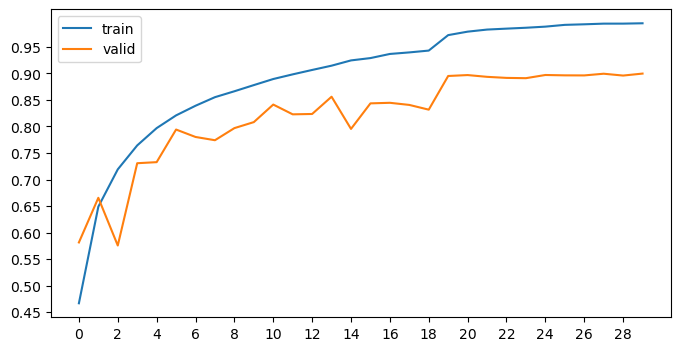

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.figure(figsize=(8, 4))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.xticks(np.arange(0, 30, 2))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

### 원본 이미지 상황에 맞지 않거나 과도한 Augmentation은 오히려 성능을 저하시킴.

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rotation_range=20,
    zoom_range=(0.7, 0.9),#zoom이 가운데 부분을 확대해서 보는건데 CIFAR는 대부분의 이미지에서 대상이 중간에 맞춰져있다. 따라서 특징들이 사라질 수 있다.
    #또한 선명도가 떨어지는 이미지에서는 조심해야한다. 
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255.0
)

valid_generator = ImageDataGenerator(rescale=1/255.0)

flow_tr_gen = train_generator.flow(tr_images, tr_oh_labels, batch_size=BATCH_SIZE, shuffle=True)
flow_val_gen = valid_generator.flow(val_images, val_oh_labels, batch_size=BATCH_SIZE, shuffle=False)

model = create_model()
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 5번 iteration내에 validation loss가 향상되지 않으면 learning rate을 기존 learning rate * 0.2로 줄임.  
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, mode='min', verbose=1)
# 10번 iteration내에 validation loss가 향상되지 않으면 더 이상 학습하지 않고 종료
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

# steps 횟수를 구하기 위해 학습 데이터의 건수와 검증 데이터의 건수를 구함. steps = ceil(학습 데이터 건수/BATCH_SIZE)
tr_data_len = tr_images.shape[0]
val_data_len = val_images.shape[0]

history = model.fit(flow_tr_gen, epochs=40, 
                    steps_per_epoch=int(np.ceil(tr_data_len/BATCH_SIZE)),#생략가능
                    validation_data=flow_val_gen, 
                    validation_steps=int(np.ceil(val_data_len/BATCH_SIZE)),#생략가능
                    callbacks=[rlr_cb, ely_cb], verbose=1)


Epoch 1/40
665/665 [==============================] - 36s 45ms/step - loss: 1.7711 - accuracy: 0.3388 - val_loss: 1.8045 - val_accuracy: 0.3612 - lr: 0.0010
Epoch 2/40
665/665 [==============================] - 29s 44ms/step - loss: 1.4427 - accuracy: 0.4787 - val_loss: 2.2203 - val_accuracy: 0.3716 - lr: 0.0010
Epoch 3/40
665/665 [==============================] - 30s 45ms/step - loss: 1.2703 - accuracy: 0.5453 - val_loss: 1.8003 - val_accuracy: 0.4372 - lr: 0.0010
Epoch 4/40
665/665 [==============================] - 30s 44ms/step - loss: 1.1498 - accuracy: 0.5947 - val_loss: 1.5107 - val_accuracy: 0.5056 - lr: 0.0010
Epoch 5/40
665/665 [==============================] - 30s 45ms/step - loss: 1.0703 - accuracy: 0.6207 - val_loss: 1.1275 - val_accuracy: 0.6056 - lr: 0.0010
Epoch 6/40
665/665 [==============================] - 30s 45ms/step - loss: 0.9979 - accuracy: 0.6501 - val_loss: 1.5136 - val_accuracy: 0.5457 - lr: 0.0010
Epoch 7/40
665/665 [==============================] - 30s 

In [14]:
test_generator = ImageDataGenerator(rescale=1/255.0)
flow_test_gen = test_generator.flow(test_images, test_oh_labels, batch_size=BATCH_SIZE, shuffle=False)
model.evaluate(flow_test_gen)

157/157 [==============================] - 1s 8ms/step - loss: 0.5915 - accuracy: 0.8085


[0.5915348529815674, 0.8084999918937683]